A 2D Model of the Solar System to estimate time taken by spaceshuttle:
                    
● Introduction:
This project explores the fundamental principles of planetary motion, specifically Kepler's Laws and circular motion, by creating a simplified 2D model of the Solar System using Python. The program calculates the positions of planets based on their orbital periods and distances from the Sun, visualizing their orbits and relative positions.

● Objectives:

• Develop a program in Python . • Simulate the positions of planets in the Solar System. • Visualize the orbits and positions of the planets in a 2D plot. • Calculate hypothetical travel distances and times between Earth and other planets. • Analyze and interpret the results of the simulation. • Kepler's Laws of Planetary Motion (focus on the first and second laws). • Circular motion concepts, including angular velocity and centripetal force.
Creates a dynamic visualization of the Solar System based on a specific date.

Key Features.

•Adds informative charts for deeper insights into planetary data:

•Orbital Periods: A bar chart showing the time each planet takes to complete one orbit around the Sun.

•Relative Distances: A pie chart showing the relative distances of planets from the Sun.

•Travel Times: A line chart showing the time required to reach each planet from Earth.

•Planet Sizes: A scatter plot comparing the relative sizes of planets.


This program utilizes concepts from Physics and Astronomy to simulate the Solar .

Distances and Travel Times from Earth🌎:
Mercury:
  Distance: 144488676.19 km
  Travel Time: 120.41 days
Venus:
  Distance: 257213128.18 km
  Travel Time: 214.34 days
Mars:
  Distance: 361176409.47 km
  Travel Time: 300.98 days
Jupiter:
  Distance: 702859726.83 km
  Travel Time: 585.72 days
Saturn:
  Distance: 1292118550.68 km
  Travel Time: 1076.77 days
Uranus:
  Distance: 2992785320.46 km
  Travel Time: 2493.99 days
Neptune:
  Distance: 4446935869.68 km
  Travel Time: 3705.78 days


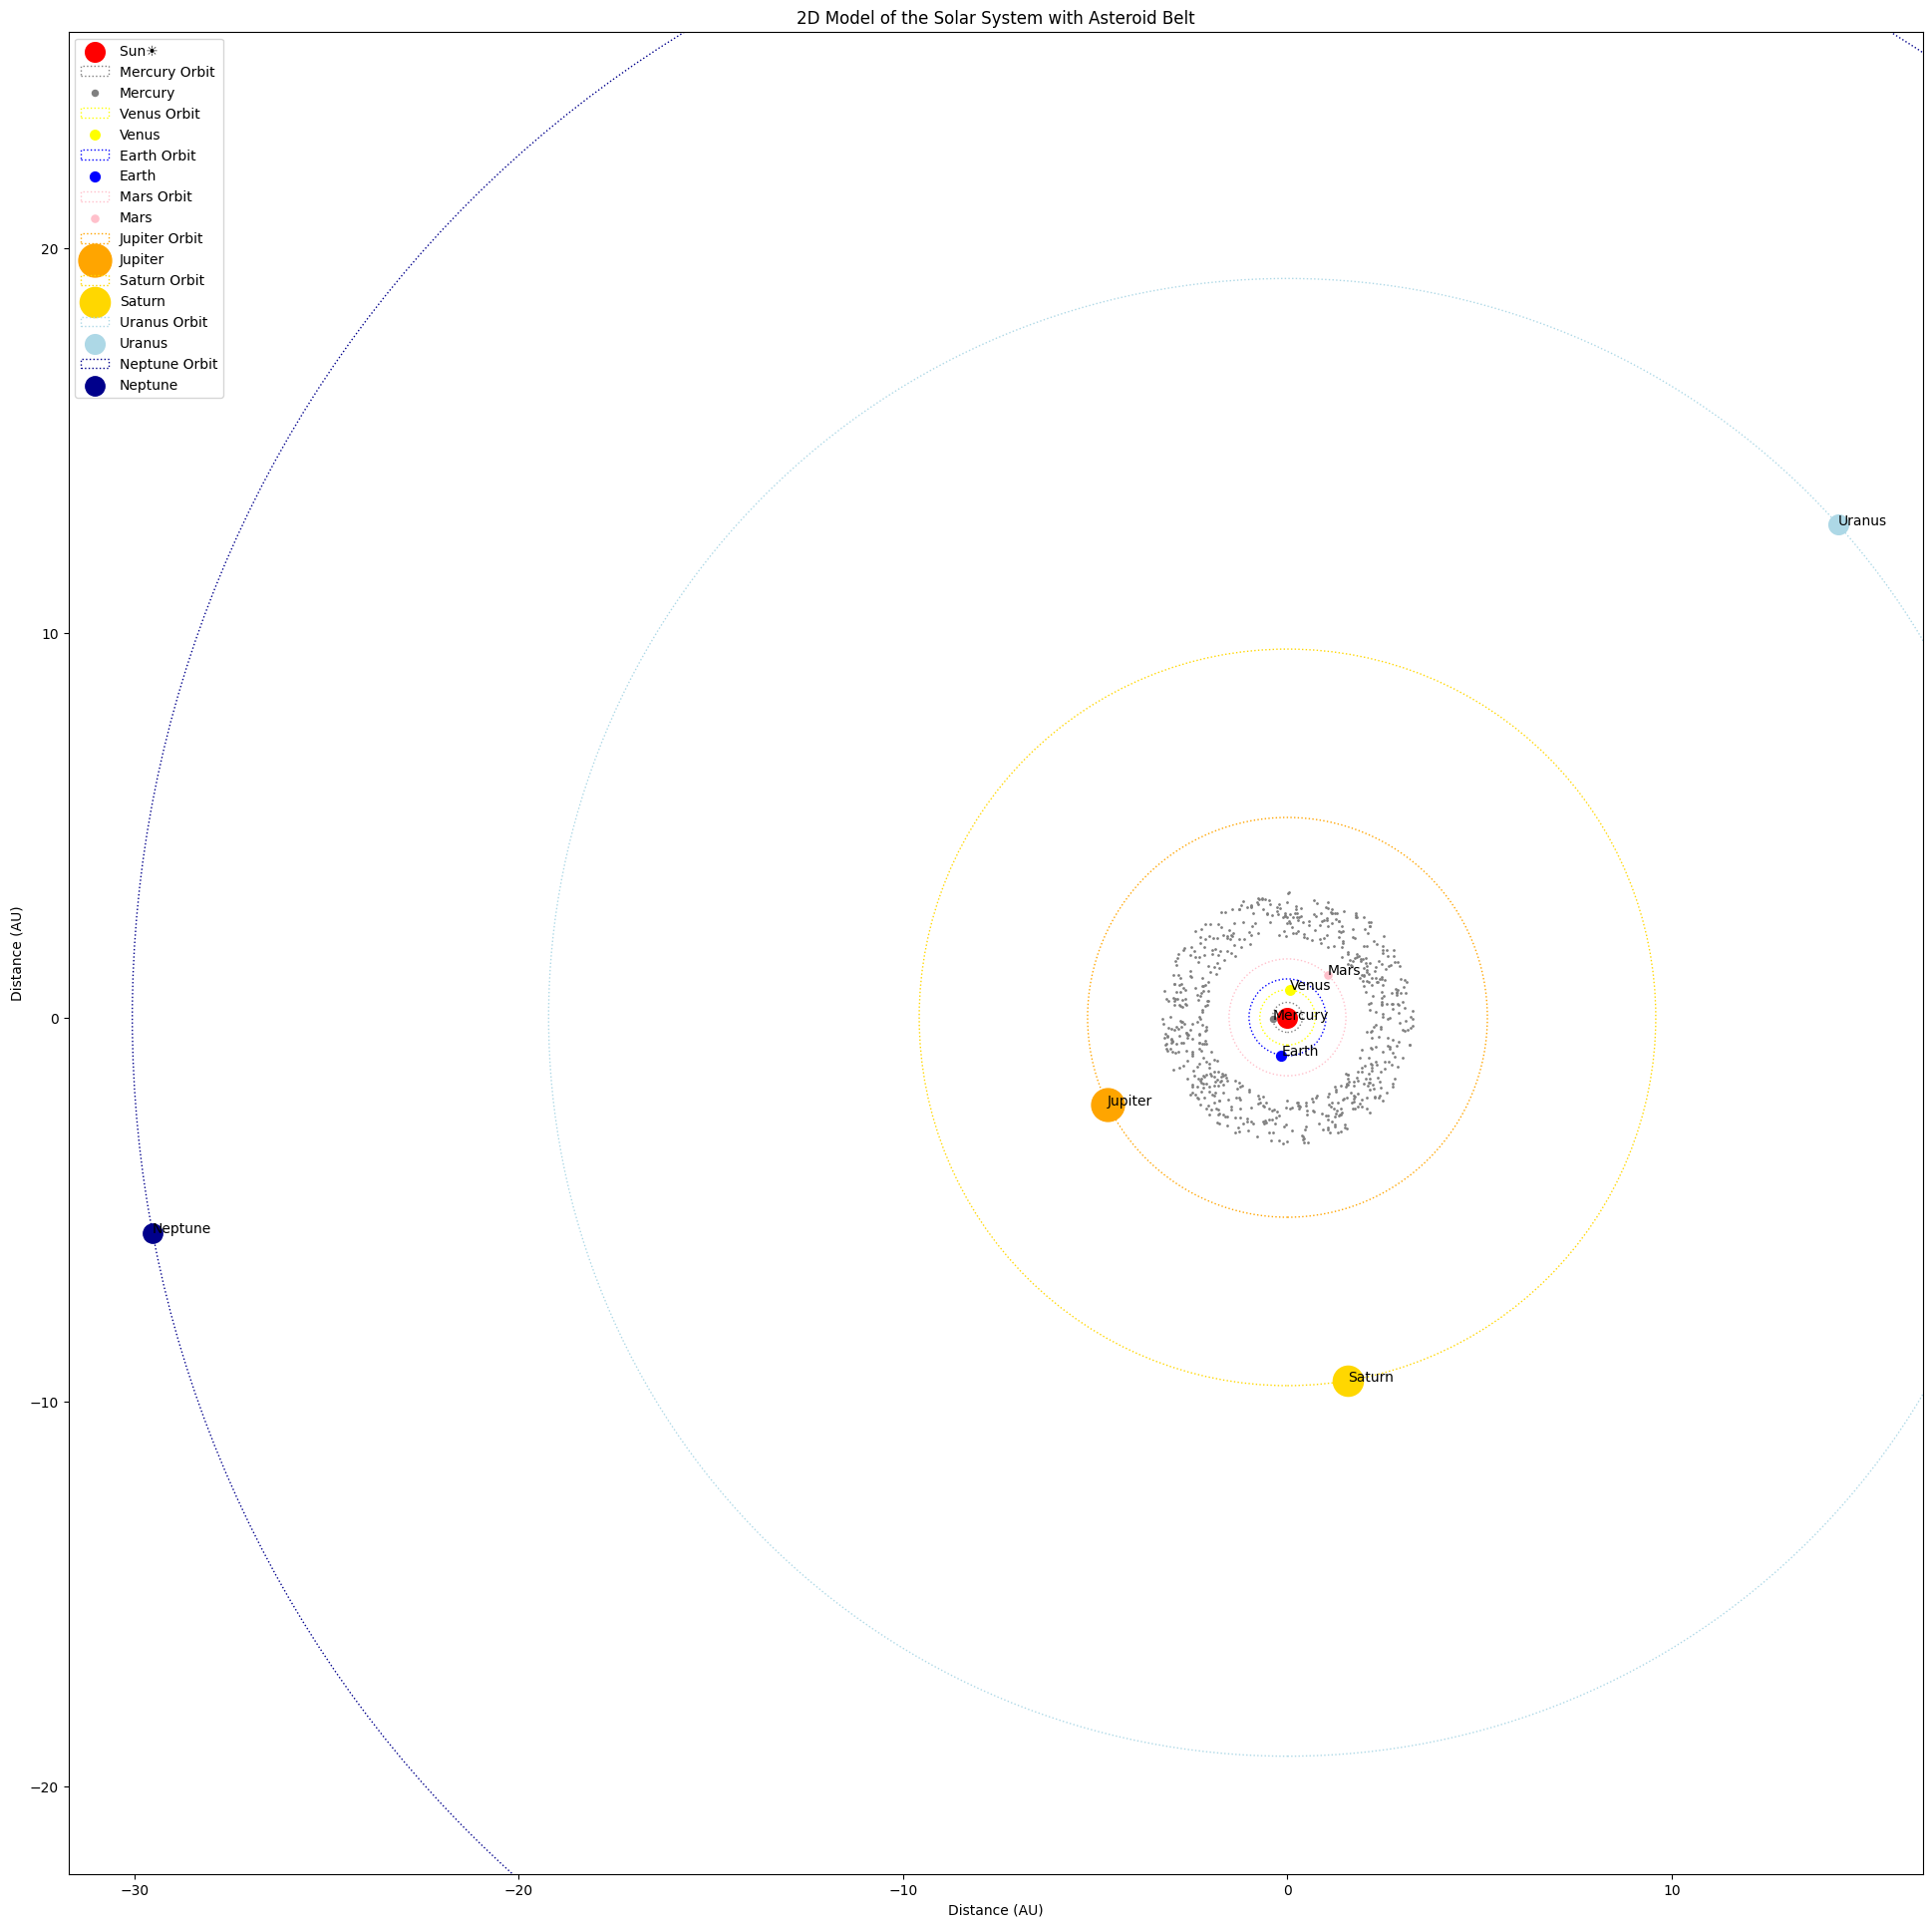

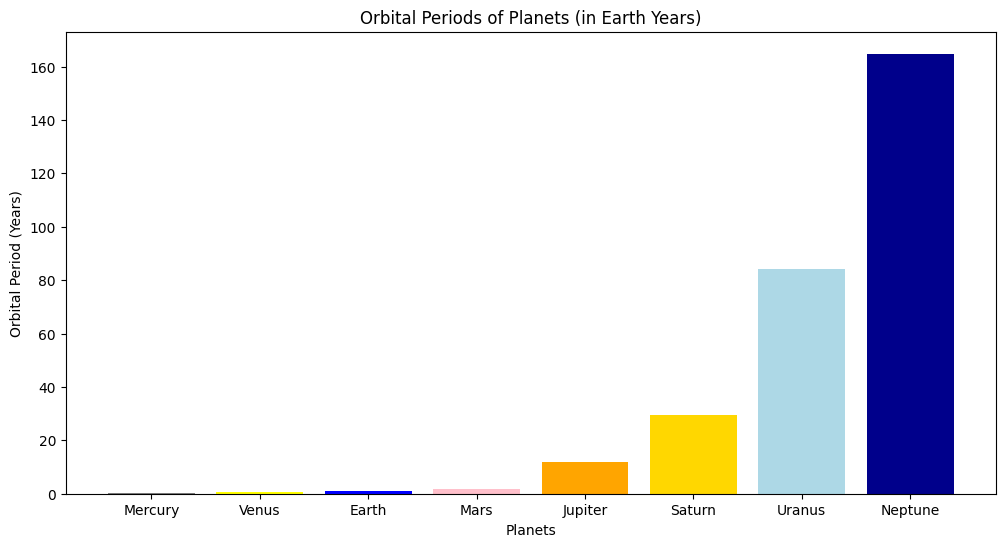

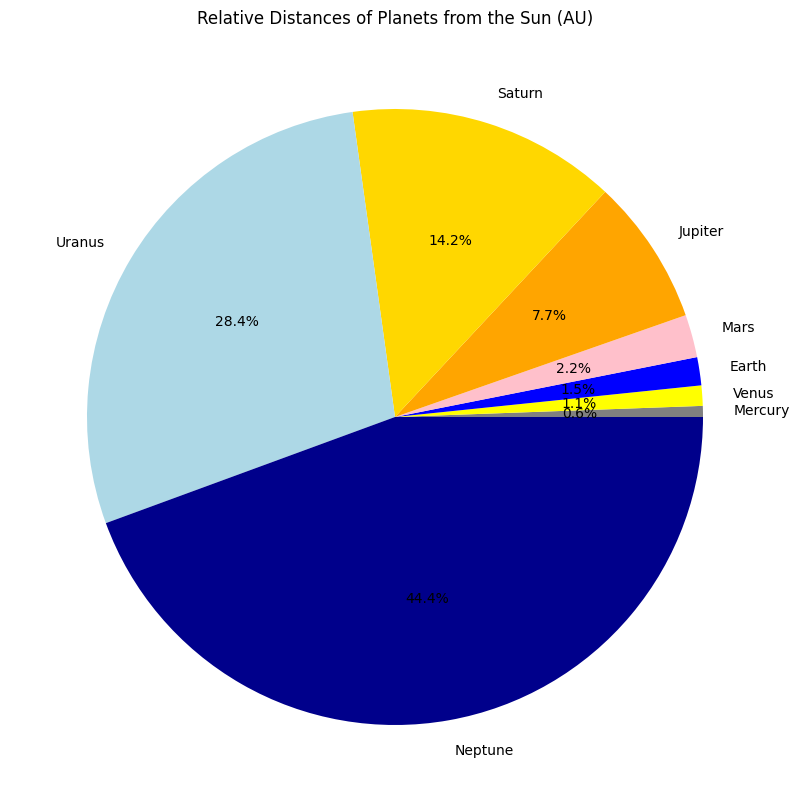

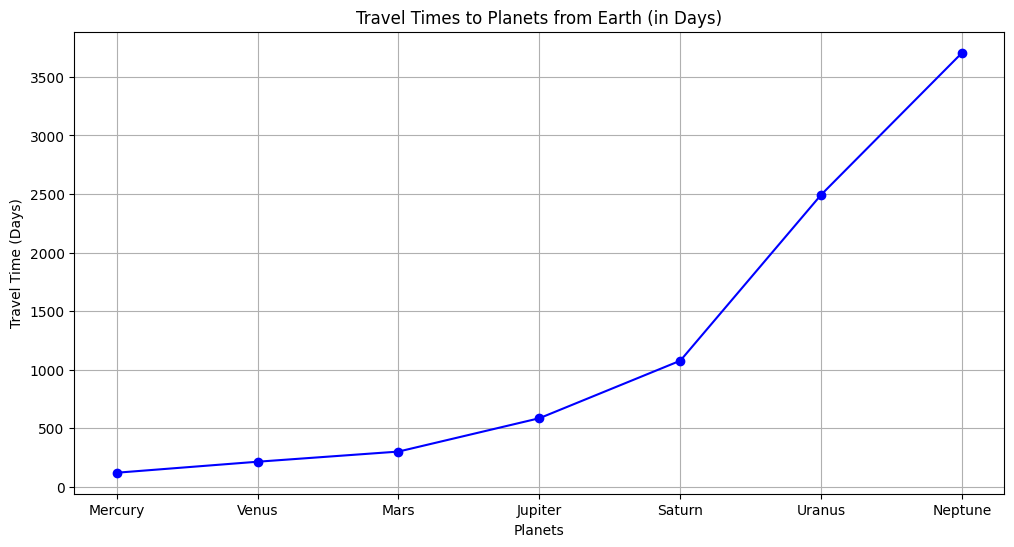

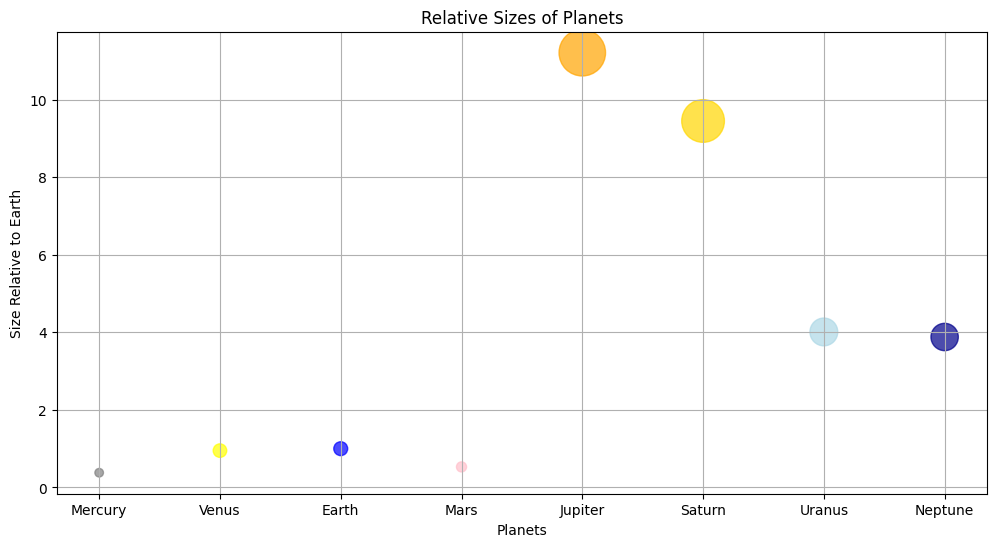

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Constants of astronomical units.
AU_TO_KM = 149597870.7  # 1 AU in kilometers.
SPACECRAFT_SPEED = 50000  # Speed of the spacecraft in km/h =13.8km/s
SECONDS_IN_DAY = 86400  # Seconds in one day
EARTH_YEAR_IN_SECONDS = 365.25 * SECONDS_IN_DAY

# Planetary Data (distance in AU, orbital period in Earth years, and relative size to Earth)
planets = {
    "Mercury": {"distance": 0.39, "period": 0.24, "color": "gray", "size": 0.38},
    "Venus": {"distance": 0.72, "period": 0.62, "color": "yellow", "size": 0.95},
    "Earth": {"distance": 1.00, "period": 1.00, "color": "blue", "size": 1.00},
    "Mars": {"distance": 1.52, "period": 1.88, "color": "pink", "size": 0.53},
    "Jupiter": {"distance": 5.20, "period": 11.86, "color": "orange", "size": 11.21},
    "Saturn": {"distance": 9.58, "period": 29.46, "color": "gold", "size": 9.45},
    "Uranus": {"distance": 19.22, "period": 84.01, "color": "lightblue", "size": 4.01},
    "Neptune": {"distance": 30.05, "period": 164.8, "color": "darkblue", "size": 3.88},
}

# Add an asteroid belt
def add_asteroid_belt():
    num_asteroids = 700  # Number of asteroids
    inner_radius = 2.1  # Inner radius of the asteroid belt in AU
    outer_radius = 3.3  # Outer radius of the asteroid belt in AU

    for _ in range(num_asteroids):
        distance = np.random.uniform(inner_radius, outer_radius)
        angle = np.random.uniform(0, 2 * np.pi)
        x = distance * np.cos(angle)
        y = distance * np.sin(angle)
        plt.scatter(x, y, color="gray", s=1)  # Asteroids as small gray dots

# Calculate planet position by angular_velocity
def calculate_position(distance, period, days_elapsed):
    angular_velocity = (2 * np.pi) / (period * EARTH_YEAR_IN_SECONDS)
    theta = angular_velocity * days_elapsed * SECONDS_IN_DAY
    x = distance * np.cos(theta)
    y = distance * np.sin(theta)
    return x, y

# Calculate distance and traveling time
def calculate_distance_and_time(earth_position, planet_position):
    distance_au = np.sqrt(
        (earth_position[0] - planet_position[0]) ** 2 +
        (earth_position[1] - planet_position[1]) ** 2
    )
    distance_km = distance_au * AU_TO_KM
    travel_time_hours = distance_km / SPACECRAFT_SPEED
    travel_time_days = travel_time_hours / 24
    return distance_km, travel_time_days

# Simulate and plot the Solar System
def simulate_solar_system(days_elapsed):
    plt.figure(figsize=(24, 24))
    plt.scatter(0, 0, color="red", label="Sun☀️", s=200)  # The Sun at the center

    earth_position = None

    for planet, data in planets.items():
        # Plot orbit as a circle
        circle = plt.Circle((0, 0), data["distance"], color=data["color"], fill=False, linestyle='dotted', label=f"{planet} Orbit")
        plt.gca().add_artist(circle)

        # Calculate and plot the planet's position
        x, y = calculate_position(data["distance"], data["period"], days_elapsed)
        plt.scatter(x, y, color=data["color"], label=f"{planet}", s=data["size"] * 50)  # Scale size relative to Earth's size
        plt.text(x, y, planet, fontsize=10)

        if planet == "Earth":
            earth_position = (x, y)

    # Add the asteroid belt
    add_asteroid_belt()

    # Print distances and travel times from Earth to other planets
    if earth_position:
        print("Distances and Travel Times from Earth🌎:")
        for planet, data in planets.items():
            if planet != "Earth":
                planet_position = calculate_position(data["distance"], data["period"], days_elapsed)
                distance_km, travel_time_days = calculate_distance_and_time(earth_position, planet_position)
                print(f"{planet}:")
                print(f"  Distance: {distance_km:.2f} km")
                print(f"  Travel Time: {travel_time_days:.2f} days")

    # Plot settings
    plt.title("2D Model of the Solar System with Asteroid Belt")
    plt.xlabel("Distance (AU)")
    plt.ylabel("Distance (AU)")
    plt.axis("equal")
    plt.grid(False)
    plt.legend()
    plt.show()

# Chart 1: Orbital Periods
def plot_orbital_periods():
    planet_names = list(planets.keys())
    orbital_periods = [planets[planet]["period"] for planet in planet_names]

    plt.figure(figsize=(12, 6))
    plt.bar(planet_names, orbital_periods, color=[planets[planet]["color"] for planet in planet_names])
    plt.title("Orbital Periods of Planets (in Earth Years)")
    plt.xlabel("Planets")
    plt.ylabel("Orbital Period (Years)")
    plt.show()

# Chart 2: Relative Distances
def plot_planet_distances():
    planet_names = list(planets.keys())
    distances = [planets[planet]["distance"] for planet in planet_names]

    plt.figure(figsize=(10, 10))
    plt.pie(distances, labels=planet_names, autopct='%1.1f%%', colors=[planets[planet]["color"] for planet in planet_names])
    plt.title("Relative Distances of Planets from the Sun (AU)")
    plt.show()

# Chart 3: Travel Times
def plot_travel_times(days_elapsed):
    earth_position = calculate_position(planets["Earth"]["distance"], planets["Earth"]["period"], days_elapsed)

    planet_names = []
    travel_times = []

    for planet, data in planets.items():
        if planet != "Earth":
            planet_position = calculate_position(data["distance"], data["period"], days_elapsed)
            _, travel_time_days = calculate_distance_and_time(earth_position, planet_position)
            planet_names.append(planet)
            travel_times.append(travel_time_days)

    plt.figure(figsize=(12, 6))
    plt.plot(planet_names, travel_times, marker='o', color='blue')
    plt.title("Travel Times to Planets from Earth (in Days)")
    plt.xlabel("Planets")
    plt.ylabel("Travel Time (Days)")
    plt.grid(True)
    plt.show()

# Chart 4: Planet Sizes
def plot_planet_sizes():
    planet_names = list(planets.keys())
    sizes = [planets[planet]["size"] for planet in planet_names]

    plt.figure(figsize=(12, 6))
    plt.scatter(planet_names, sizes, s=[size * 100 for size in sizes], color=[planets[planet]["color"] for planet in planet_names], alpha=0.7)
    plt.title("Relative Sizes of Planets")
    plt.xlabel("Planets")
    plt.ylabel("Size Relative to Earth")
    plt.grid(True)
    plt.show()

# Main Function
if __name__ == "__main__":
   # time will be in form of YYYY MM DD..
    start_date = datetime(2267, 4, 6)
    current_date = datetime.now()
    days_elapsed = (current_date - start_date).days

    # Simulate Solar System
    simulate_solar_system(days_elapsed)

    # Plot charts
    plot_orbital_periods()
    plot_planet_distances()
    plot_travel_times(days_elapsed)
    plot_planet_sizes()

       The 3-Body Problem 3D Simulation.
● Introduction:
The three-body problem is a classical problem in physics and astronomy that describes the motion of three celestial objects under their mutual gravitational influences. Unlike the simpler two-body problem, which has an exact solution, the three-body problem is chaotic and does not have a general analytical solution. This program numerically solves the three-body problem and visualizes the trajectories of three masses in a three-dimensional space.
● Newton's Law of Universal Gravitation.
• Newton's 1st law. The program is based on Newton's Law of Universal Gravitation, which states:
F = G * m1 m2/r²
•F is the gravitational force between two masses. • G is the gravitational constant. • m¹ and m² are the masses of the objects. • r is the distance between the centers of the two masses.
This law is applied to calculate the gravitational forces acting on each of the three bodies due to the other two.
● Newton's Second Law of Motion
Newton's Second Law, , is used to relate the forces to the accelerations of the bodies. Combining this with the gravitational force gives the equations of motion for the system.

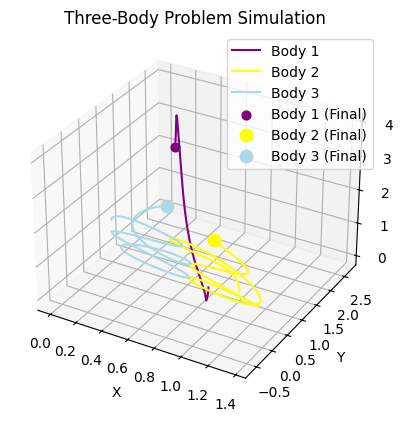

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Masses of the bodies
m1, m2, m3 = 1.0, 1.0, 1.0

# Initial positions (arbitrary units)
initial_position_1 = [1.0, 0.0, 1.0]
initial_position_2 = [1.0, 1.0, 0.0]
initial_position_3 = [0.0, 1.0, 1.0]

# Initial velocities (arbitrary units)
initial_velocity_1 = [0.0, 0.0, -1.0]
initial_velocity_2 = [0.0, 0.0, 1.0]
initial_velocity_3 = [0.0, 0.0, 0.6]

# Combine initial positions and velocities
initial_conditions = np.array([
    initial_position_1, initial_position_2, initial_position_3,
    initial_velocity_1, initial_velocity_2, initial_velocity_3
]).ravel()

# Time span and points for simulation
time_s, time_e = 0, 10
t_points = np.linspace(time_s, time_e, 1001)

# Function to define the system's ODEs
def system_odes(t, S, m1, m2, m3):
    # Unpack positions and velocities
    p1, p2, p3 = S[0:3], S[3:6], S[6:9]
    dp1_dt, dp2_dt, dp3_dt = S[9:12], S[12:15], S[15:18]

    # Newtonian gravitational forces
    df1_dt = m3 * (p3 - p1) / np.linalg.norm(p3 - p1)**3 + m2 * (p2 - p1) / np.linalg.norm(p2 - p1)**3
    df2_dt = m3 * (p3 - p2) / np.linalg.norm(p3 - p2)**3 + m1 * (p1 - p2) / np.linalg.norm(p1 - p2)**3
    df3_dt = m1 * (p1 - p3) / np.linalg.norm(p1 - p3)**3 + m2 * (p2 - p3) / np.linalg.norm(p2 - p3)**3

    # Return derivatives
    return np.array([dp1_dt, dp2_dt, dp3_dt, df1_dt, df2_dt, df3_dt]).ravel()

# Solve the system of equations
solution = solve_ivp(
    fun=system_odes,
    t_span=(time_s, time_e),
    y0=initial_conditions,
    t_eval=t_points,
    args=(m1, m2, m3)
)

# Extract solutions for plotting
t_sol = solution.t
p1x_sol, p1y_sol, p1z_sol = solution.y[0], solution.y[1], solution.y[2]
p2x_sol, p2y_sol, p2z_sol = solution.y[3], solution.y[4], solution.y[5]
p3x_sol, p3y_sol, p3z_sol = solution.y[6], solution.y[7], solution.y[8]

# Plot the results in 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Trajectories
ax.plot(p1x_sol, p1y_sol, p1z_sol, color='purple', label='Body 1')
ax.plot(p2x_sol, p2y_sol, p2z_sol, color='yellow', label='Body 2')
ax.plot(p3x_sol, p3y_sol, p3z_sol, color='lightblue', label='Body 3')

# Final positions
ax.scatter(p1x_sol[-1], p1y_sol[-1], p1z_sol[-1], color='purple', s=40, label='Body 1 (Final)')
ax.scatter(p2x_sol[-1], p2y_sol[-1], p2z_sol[-1], color='yellow', s=80, label='Body 2 (Final)')
ax.scatter(p3x_sol[-1], p3y_sol[-1], p3z_sol[-1], color='lightblue', s=80, label='Body 3 (Final)')

# Labels and legend
ax.set_title("Three-Body Problem Simulation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()